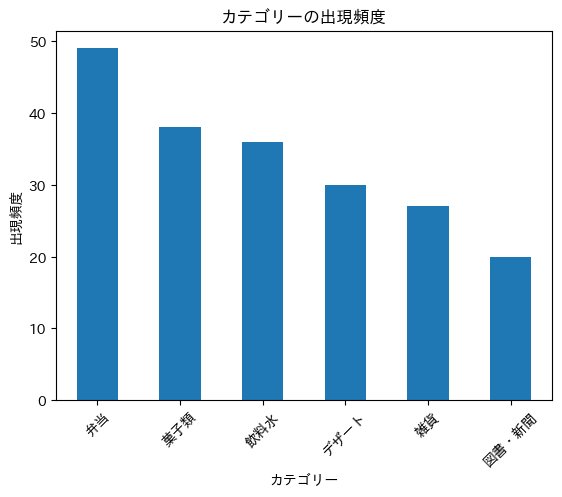

商品番号
1QJFO8QY    600.0
2HSTCDWM    300.0
48XMJXKO    330.0
8T7D5DQA    120.0
MESUDVWQ    660.0
QRMOGNUU    420.0
S6RE8W6X    720.0
X0ZE2ZMY     90.0
YY4HAAZR    780.0
Z4WOOIYV     90.0
Name: 単価, dtype: float64
          count   mean  std    min    25%    50%    75%    max
商品番号                                                          
1QJFO8QY   32.0  600.0  0.0  600.0  600.0  600.0  600.0  600.0
2HSTCDWM   20.0  300.0  0.0  300.0  300.0  300.0  300.0  300.0
48XMJXKO   10.0  330.0  0.0  330.0  330.0  330.0  330.0  330.0
8T7D5DQA   21.0  120.0  0.0  120.0  120.0  120.0  120.0  120.0
MESUDVWQ   17.0  660.0  0.0  660.0  660.0  660.0  660.0  660.0
QRMOGNUU   27.0  420.0  0.0  420.0  420.0  420.0  420.0  420.0
S6RE8W6X   20.0  720.0  0.0  720.0  720.0  720.0  720.0  720.0
X0ZE2ZMY   14.0   90.0  0.0   90.0   90.0   90.0   90.0   90.0
YY4HAAZR   17.0  780.0  0.0  780.0  780.0  780.0  780.0  780.0
Z4WOOIYV   22.0   90.0  0.0   90.0   90.0   90.0   90.0   90.0


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib

# csvファイルをデータフレームとして読み込む
df = pd.read_csv("sample_pandas_6.csv")
# 先頭から5行目までを表示する
df.head()

df.query('商品番号 == "Z4WOOIYV"')
df.query('単価 == 600')
df.query('在庫 <= 5')
df.query('商品番号 == "8T7D5DQA" and 在庫 <= 5')

def tax(x):
    return x * 1.10

df['単価'].apply(tax)

type(df['発注日'].loc[0])
type(pd.to_datetime(df['発注日']).loc[0])
df.agg({'発注日':['max', 'min']})

tax_series = df['単価'].apply(tax)
tax_series.name = "単価（税込み）"
pd.concat([df, tax_series], axis=1)

category_df = pd.read_csv("category.csv")
category_df

df = pd.merge(df, category_df[['商品番号', 'カテゴリー']], how='inner', on='商品番号')
df

category_counts = df['カテゴリー'].value_counts()

category_counts.plot(kind='bar')
plt.xlabel("カテゴリー")
plt.ylabel("出現頻度")
plt.title("カテゴリーの出現頻度")
plt.xticks(rotation=45)  # X軸のラベルを回転して見やすくする
plt.show()

grouped_price_mean = df.groupby('商品番号')['単価'].mean()
print(grouped_price_mean)

grouped_price_stats = df.groupby('商品番号')['単価'].describe()
print(grouped_price_stats)